Step 1 : Understanding the given dataset

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:


#Load the Data
df = pd.read_csv('/Users/brundamariswamy/Desktop/North_America-United_States.csv')


df.info() #To check basic information about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42253 entries, 0 to 42252
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           42253 non-null  int64  
 1   iso               42253 non-null  int64  
 2   event_id_cnty     42253 non-null  object 
 3   event_id_no_cnty  42253 non-null  int64  
 4   event_date        42253 non-null  object 
 5   year              42253 non-null  int64  
 6   time_precision    42253 non-null  int64  
 7   event_type        42253 non-null  object 
 8   sub_event_type    42253 non-null  object 
 9   actor1            42253 non-null  object 
 10  assoc_actor_1     32392 non-null  object 
 11  inter1            42253 non-null  int64  
 12  actor2            3882 non-null   object 
 13  assoc_actor_2     1152 non-null   object 
 14  inter2            42253 non-null  int64  
 15  interaction       42253 non-null  int64  
 16  region            42253 non-null  object

In [84]:
# Display first few lines of data
df.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9383068,840,USA44621,44621,24 June 2022,2022,1,Protests,Excessive force against protesters,Protesters (United States),...,Cedar Rapids,41.9738,-91.6768,1,KCRG-TV9; Network Contagion Research Institute...,Local partner-National,"On 24 June 2022, 'pro-choice' protesters gathe...",0,1656458658,USA
1,9383099,840,USA44775,44775,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Fayetteville,36.0626,-94.1574,1,Southwest Times Record; 40/29,Subnational,"On 24 June 2022, well over 100 people includin...",0,1656458658,USA
2,9383100,840,USA44783,44783,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Eureka,40.8040,-124.1654,1,Lost Coast Outpost; North Coast Journal,Subnational,"On 24 June 2022, hundreds of people rallied ou...",0,1656458658,USA


Step 2 : Data Cleaning

In [85]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1        9861
inter1                  0
actor2              38371
assoc_actor_2       41101
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                 67
admin3              42253
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
dtype: int64


In [86]:
df.shape

(42253, 31)

In [87]:
# List of admin columns to be removed
columns_to_remove = ['actor2', 'assoc_actor_2', 'admin3','iso','event_id_no_cnty','latitude', 'longitude','geo_precision','source_scale','iso3']

# Drop the admin columns from the DataFrame
df = df.drop(columns=columns_to_remove)

# Check the DataFrame after removing the columns
df.head(3)

,data_id,event_id_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,interaction,region,country,admin1,admin2,location,source,notes,fatalities,timestamp
0,9383068,USA44621,24 June 2022,2022,1,Protests,Excessive force against protesters,Protesters (United States),Women (United States),6,...,36,North America,United States,Iowa,Linn,Cedar Rapids,KCRG-TV9; Network Contagion Research Institute...,"On 24 June 2022, 'pro-choice' protesters gathe...",0,1656458658
1,9383099,USA44775,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),DEM: Democratic Party; Women (United States),6,...,60,North America,United States,Arkansas,Washington,Fayetteville,Southwest Times Record; 40/29,"On 24 June 2022, well over 100 people includin...",0,1656458658
2,9383100,USA44783,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),Women (United States),6,...,60,North America,United States,California,Humboldt,Eureka,Lost Coast Outpost; North Coast Journal,"On 24 June 2022, hundreds of people rallied ou...",0,1656458658


In [88]:
# Replace blank values with 0
df = df.replace(to_replace='', value=0)

# Check if blank values are replaced
df.isnull().sum()

data_id              0
event_id_cnty        0
event_date           0
year                 0
time_precision       0
event_type           0
sub_event_type       0
actor1               0
assoc_actor_1     9861
inter1               0
inter2               0
interaction          0
region               0
country              0
admin1               0
admin2              67
location             0
source               0
notes                0
fatalities           0
timestamp            0
dtype: int64

In [89]:
# Assuming 'df' is your DataFrame
columns_to_fill = ['assoc_actor_1', 'admin2']

# Fill null values in specified columns with 'Unknown'
df.fillna({col: 'Unknown' for col in columns_to_fill}, inplace=True)

In [90]:
df.isnull().sum()

data_id           0
event_id_cnty     0
event_date        0
year              0
time_precision    0
event_type        0
sub_event_type    0
actor1            0
assoc_actor_1     0
inter1            0
inter2            0
interaction       0
region            0
country           0
admin1            0
admin2            0
location          0
source            0
notes             0
fatalities        0
timestamp         0
dtype: int64

In [91]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
duplicate_rows


,data_id,event_id_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,interaction,region,country,admin1,admin2,location,source,notes,fatalities,timestamp


In [92]:
df.describe()

,data_id,year,time_precision,inter1,inter2,interaction,fatalities,timestamp
count,4.225300e+04,42253.000000,42253.000000,42253.000000,42253.000000,42253.000000,42253.00000,4.225300e+04
mean,8.266701e+06,2020.629446,1.005420,5.974629,0.330107,58.228173,0.00071,1.627586e+09
std,5.542718e+05,0.742141,0.074062,0.157251,1.280444,9.165026,0.03076,1.388701e+07
min,7.593655e+06,2020.000000,1.000000,5.000000,0.000000,15.000000,0.00000,1.612546e+09
25%,7.616741e+06,2020.000000,1.000000,6.000000,0.000000,60.000000,0.00000,1.612547e+09
50%,8.265289e+06,2020.000000,1.000000,6.000000,0.000000,60.000000,0.00000,1.624483e+09
75%,8.680161e+06,2021.000000,1.000000,6.000000,0.000000,60.000000,0.00000,1.638920e+09
max,9.383708e+06,2022.000000,3.000000,6.000000,8.000000,68.000000,3.00000,1.656459e+09


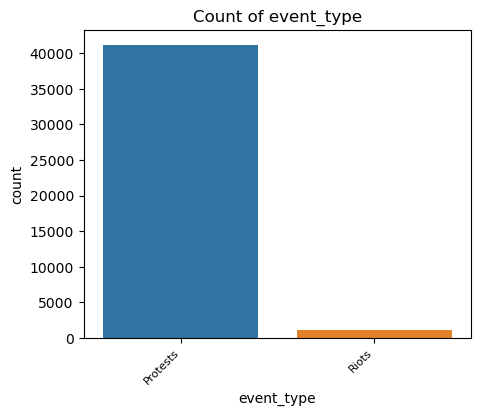

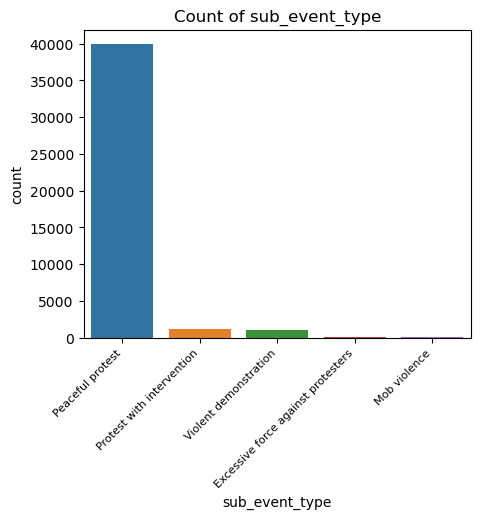

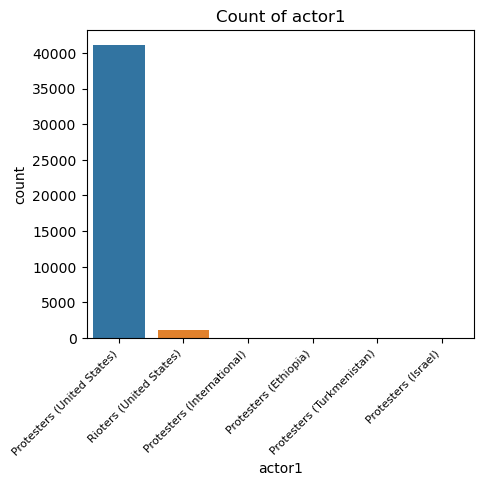

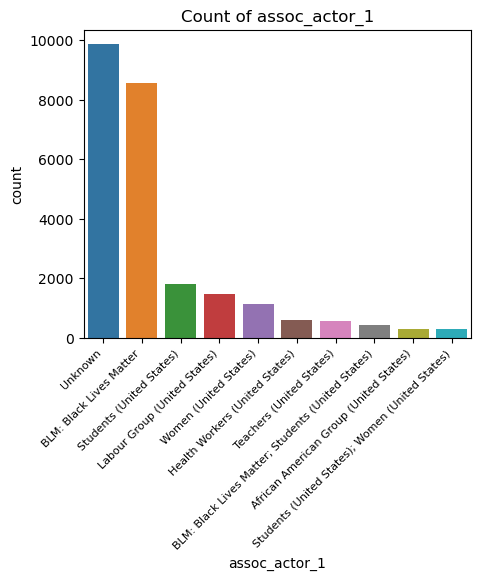

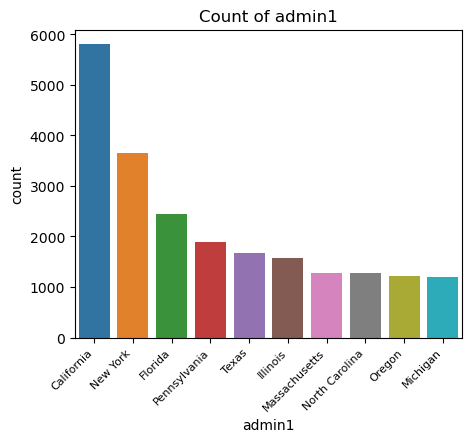

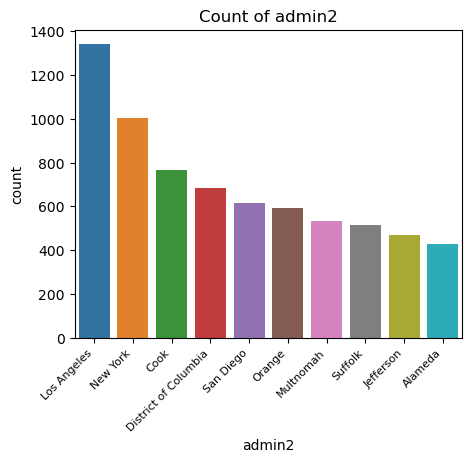

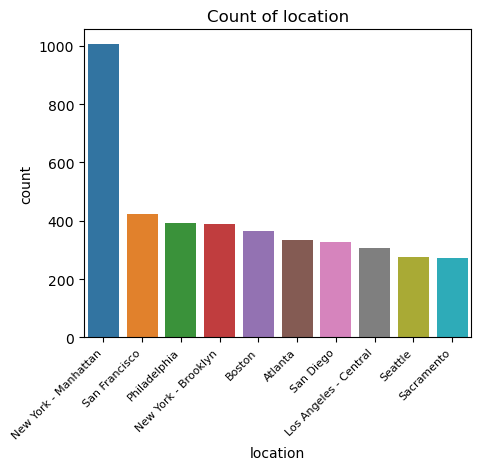

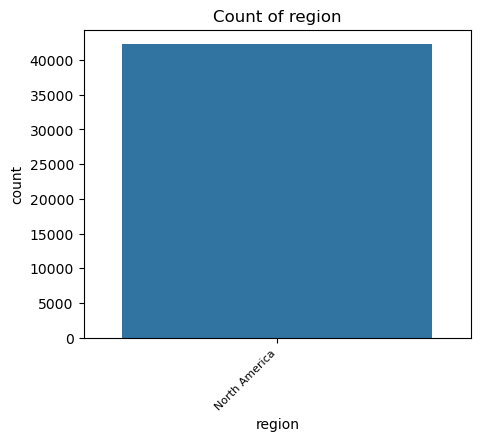

In [111]:
# Bar plots for categorical features
categorical_columns = ['event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'admin1', 'admin2', 'location',]
for col in categorical_columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right', fontsize=8)  
    plt.show()

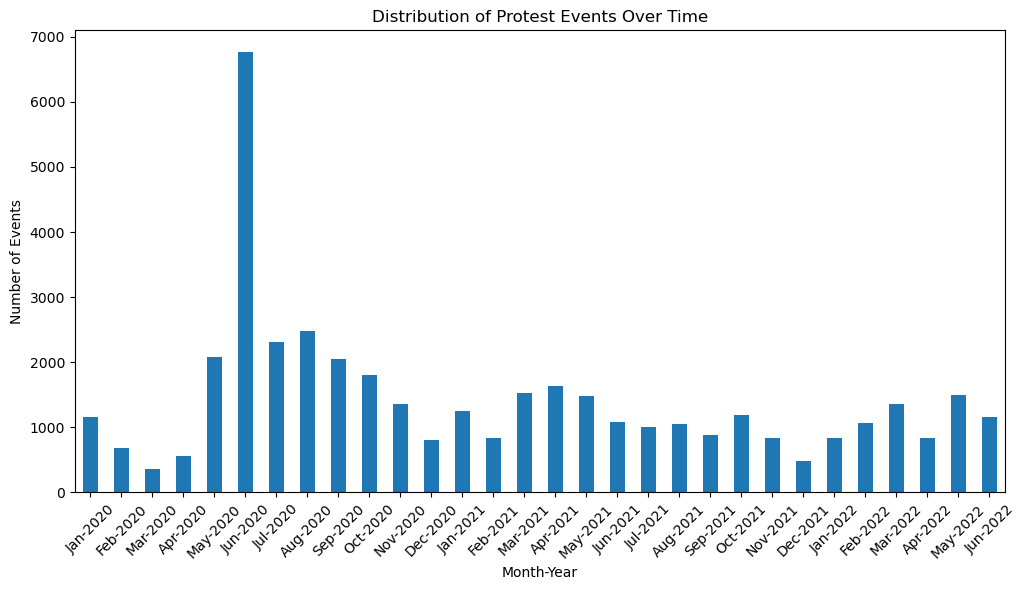

In [110]:
# Convert 'event_date' to datetime format
df['event_date'] = pd.to_datetime(df['event_date'], format='%d-%b-%y')

# Extract month and year from the 'event_date' column
month_year = df['event_date'].dt.to_period('M')

# Plot histogram
plt.figure(figsize=(12, 6))
monthly_counts = month_year.value_counts().sort_index()
monthly_counts.plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Number of Events')
plt.title('Distribution of Protest Events Over Time')

# Format x-axis labels to display as "Jan-2020" instead of "2020-01"
plt.xticks(range(len(monthly_counts)), [d.strftime('%b-%Y') for d in monthly_counts.index], rotation=45)

plt.show()


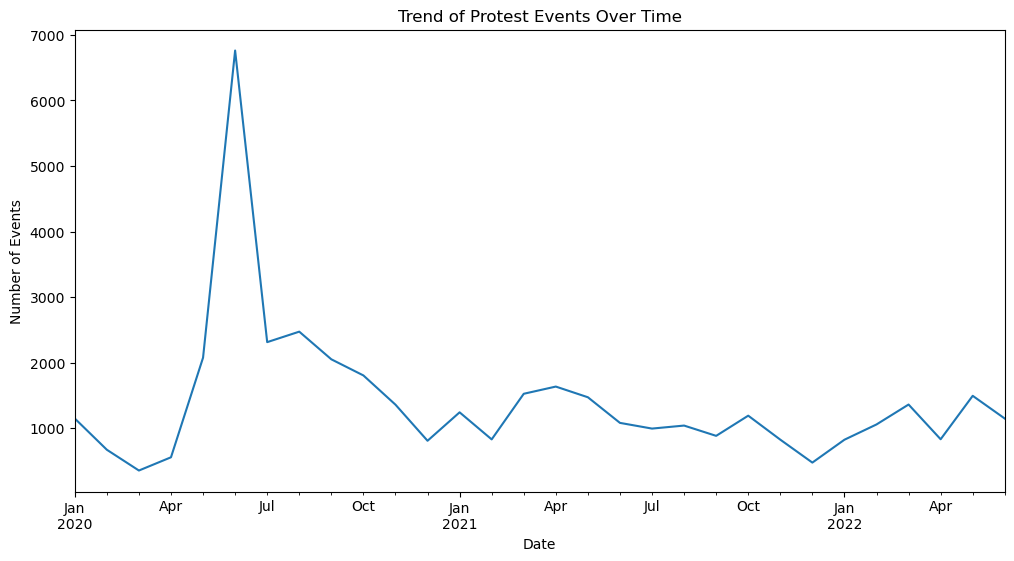

In [112]:
df['event_date'] = pd.to_datetime(df['event_date'])
monthly_counts = df.resample('M', on='event_date').size()
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Trend of Protest Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()


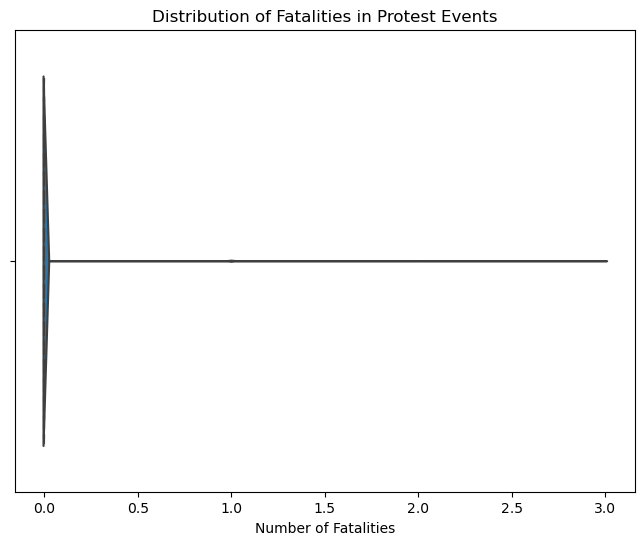

In [116]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='fatalities', data=df, inner='quartile')
plt.title('Distribution of Fatalities in Protest Events')
plt.xlabel('Number of Fatalities')
plt.show()


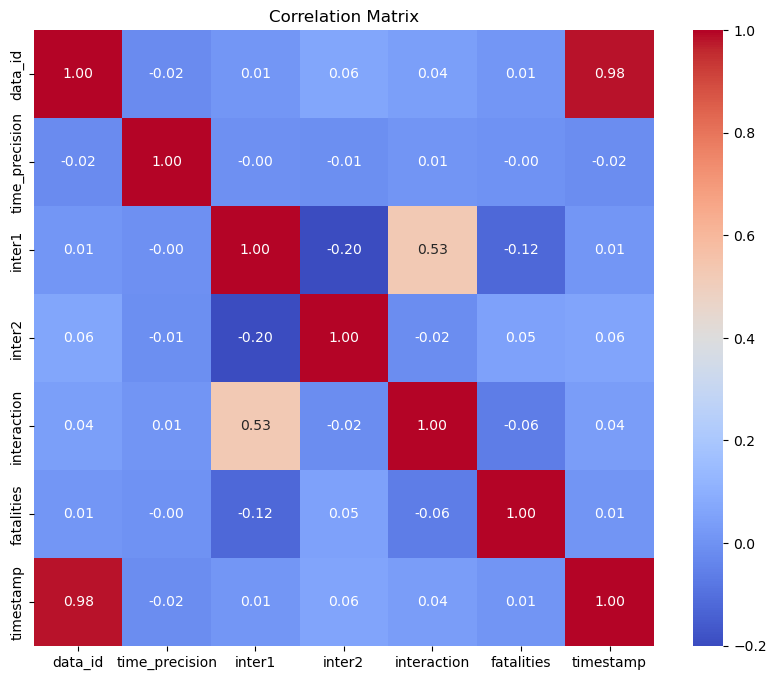

In [117]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


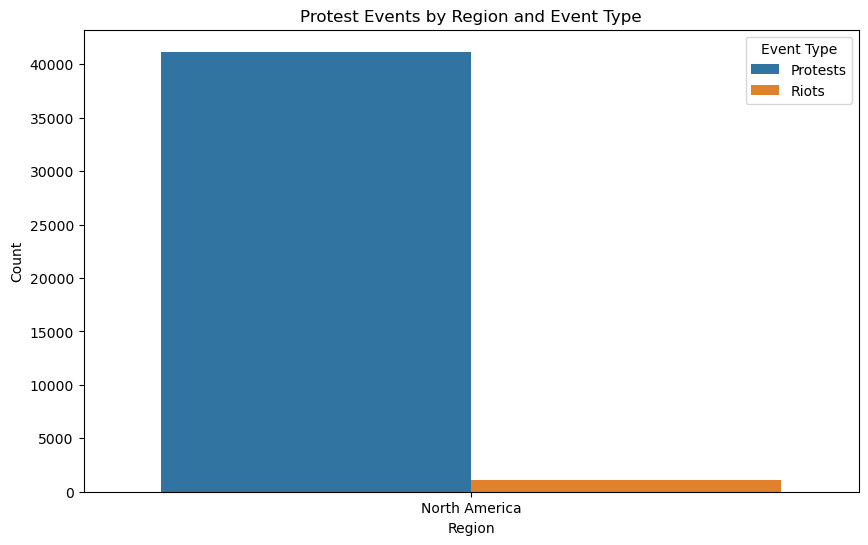

In [119]:
# Stacked Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='event_type', data=df)
plt.title('Protest Events by Region and Event Type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Event Type', loc='upper right')
plt.show()


/Users/brundamariswamy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


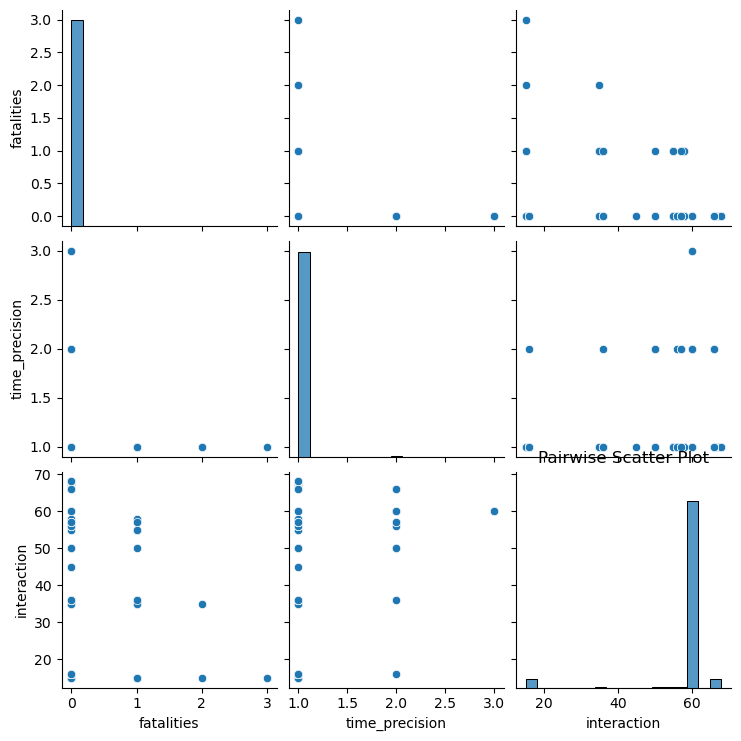

In [120]:
# Pairwise Scatter Plot
sns.pairplot(df[['fatalities', 'time_precision', 'interaction']])
plt.title('Pairwise Scatter Plot')
plt.show()

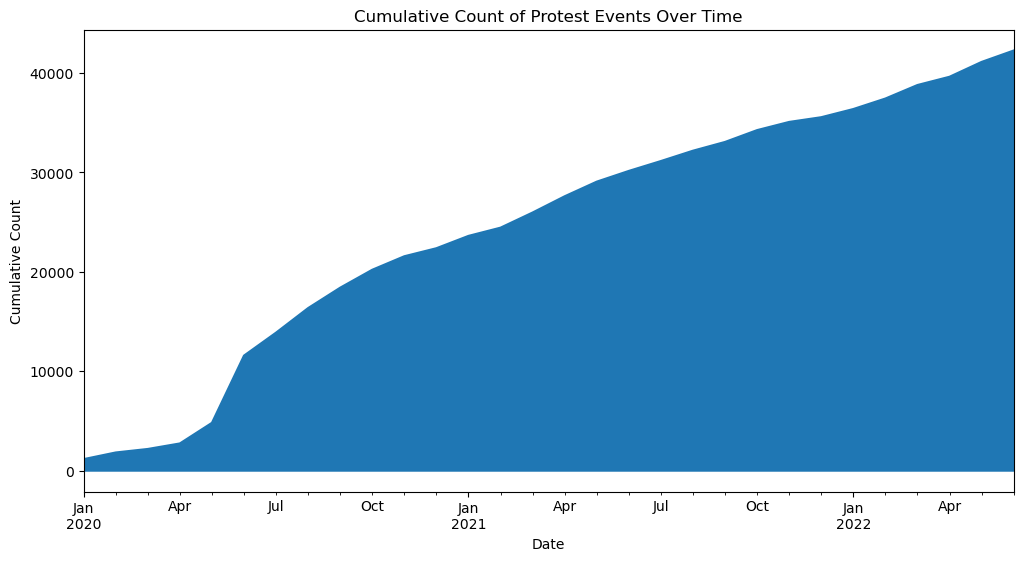

In [123]:
# Area Plot
plt.figure(figsize=(12, 6))
df.groupby(df['event_date'].dt.to_period('M')).size().cumsum().plot(kind='area')
plt.title('Cumulative Count of Protest Events Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.show()

In [127]:
# Descriptive Statistics

df.describe(include='all')



,data_id,event_id_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,interaction,region,country,admin1,admin2,location,source,notes,fatalities,timestamp
count,4.225300e+04,42253,42253,42253,42253.000000,42253,42253,42253,42253,42253.000000,...,42253.000000,42253,42253,42253,42253,42253,42253,42253,42253.00000,4.225300e+04
unique,NaN,42253,NaN,NaN,NaN,2,5,6,5429,NaN,...,NaN,1,1,51,1225,4207,14344,42250,NaN,NaN
top,NaN,USA44621,NaN,NaN,NaN,Protests,Peaceful protest,Protesters (United States),Unknown,NaN,...,NaN,North America,United States,California,Los Angeles,New York - Manhattan,Twitter,"Around 23 March 2021 (as reported), hundreds o...",NaN,NaN
freq,NaN,1,NaN,NaN,NaN,41181,39911,41166,9861,NaN,...,NaN,42253,42253,5803,1340,1006,443,3,NaN,NaN
mean,8.266701e+06,NaN,2021-02-01 17:24:29.803327488,2021-02-01 17:24:29.803327488,1.005420,NaN,NaN,NaN,NaN,5.974629,...,58.228173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00071,1.627586e+09
min,7.593655e+06,NaN,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,NaN,NaN,NaN,NaN,5.000000,...,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.612546e+09
25%,7.616741e+06,NaN,2020-06-20 00:00:00,2020-06-20 00:00:00,1.000000,NaN,NaN,NaN,NaN,6.000000,...,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.612547e+09
50%,8.265289e+06,NaN,2020-11-17 00:00:00,2020-11-17 00:00:00,1.000000,NaN,NaN,NaN,NaN,6.000000,...,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.624483e+09
75%,8.680161e+06,NaN,2021-08-18 00:00:00,2021-08-18 00:00:00,1.000000,NaN,NaN,NaN,NaN,6.000000,...,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.638920e+09
max,9.383708e+06,NaN,2022-06-24 00:00:00,2022-06-24 00:00:00,3.000000,NaN,NaN,NaN,NaN,6.000000,...,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,1.656459e+09


In [128]:
# Categorical Frequency Counts
print("\nCategorical Frequency Counts:")
df['event_type'].value_counts()




Categorical Frequency Counts:


event_type
Protests    41181
Riots        1072
Name: count, dtype: int64

In [129]:
# Range
print("\nRange of Fatalities:")
print("Range:", df['fatalities'].max() - df['fatalities'].min())



Range of Fatalities:
Range: 3


In [131]:

# Quartiles
print("\nQuartiles of Fatalities:")
df['fatalities'].quantile([0.25, 0.5, 0.75])




Quartiles of Fatalities:


0.25    0.0
0.50    0.0
0.75    0.0
Name: fatalities, dtype: float64

In [132]:
# Crosstabulation
print("\nCrosstabulation of Region and Event Type:")
print(pd.crosstab(df['region'], df['event_type']))




Crosstabulation of Region and Event Type:
event_type     Protests  Riots
region                        
North America     41181   1072


In [133]:
# Chi-square Test
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['region'], df['event_type']))
print("\nChi-square Test:")
print("Chi-square Statistic:", chi2)
print("P-value:", p)


Chi-square Test:
Chi-square Statistic: 0.0
P-value: 1.0
